In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize
from datetime import datetime
from matplotlib import gridspec

In [2]:
%matplotlib inline

In [3]:
sns.set(color_codes=True)

# Readme
Let me start by saying that I am not a statistician nor am I a disease expert.  This is simply an exercise for me to learn and practice using Jupyter notebooks with data that I think is relevant to everyone today.  If you wish to copy my notebook and do your own analysis, please by all means go for it.  If anyone wants to provide feedback on how I can improve anything, it would most certainly be welcome.  

## Data
The data I am using comes from the NY Times here:
https://github.com/nytimes/covid-19-data/

In [4]:
df_states = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
df_counties = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')

# Data Cleanup
The NY times data comes as running totals.  Therefore, I have to sort by state, county, and date, then group by state or county, and then calculate the diff of the previous day to come up with the new cases and deaths each day.

In [5]:
df_states.sort_values(['state', 'date'], inplace=True)
df_states['date'] = pd.to_datetime(df_states['date'])
df_states['previous_state'] = df_states.state.shift(1);
df_states['new cases'] = df_states['cases'].diff()
df_states['new deaths'] = df_states['deaths'].diff()
df_states['new cases'] = df_states.apply(lambda x: 0 if x.previous_state != x.state else x['new cases'], axis=1)
df_states['new deaths'] = df_states.apply(lambda x: 0 if x.previous_state != x.state else x['new deaths'], axis=1)
df_states.drop(['previous_state'], axis=1, inplace=True)
df_states.head(5)

,date,state,fips,cases,deaths,new cases,new deaths
586,2020-03-13,Alabama,1,6,0,0.0,0.0
637,2020-03-14,Alabama,1,12,0,6.0,0.0
689,2020-03-15,Alabama,1,23,0,11.0,0.0
742,2020-03-16,Alabama,1,29,0,6.0,0.0
795,2020-03-17,Alabama,1,39,0,10.0,0.0


In [6]:
df_counties.sort_values(['state', 'county', 'date'], inplace=True)
#df_counties['date'].map(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df_counties['date'] = pd.to_datetime(df_counties['date'])
df_counties['previous_country'] = df_counties.county.shift(1);
df_counties['new cases'] = df_counties['cases'].diff()
df_counties['new deaths'] = df_counties['deaths'].diff()
df_counties['new cases'] = df_counties.apply(lambda x: 0 if x.previous_country != x.county else x['new cases'], axis=1)
df_counties['new deaths'] = df_counties.apply(lambda x: 0 if x.previous_country != x.county else x['new deaths'], axis=1)
df_counties.drop(['previous_country'], axis=1, inplace=True)
df_counties.head(5)

,date,county,state,fips,cases,deaths,new cases,new deaths
9480,2020-03-24,Autauga,Alabama,1001.0,1,0,0.0,0.0
10832,2020-03-25,Autauga,Alabama,1001.0,4,0,3.0,0.0
12361,2020-03-26,Autauga,Alabama,1001.0,6,0,2.0,0.0
14021,2020-03-27,Autauga,Alabama,1001.0,6,0,0.0,0.0
15801,2020-03-28,Autauga,Alabama,1001.0,6,0,0.0,0.0


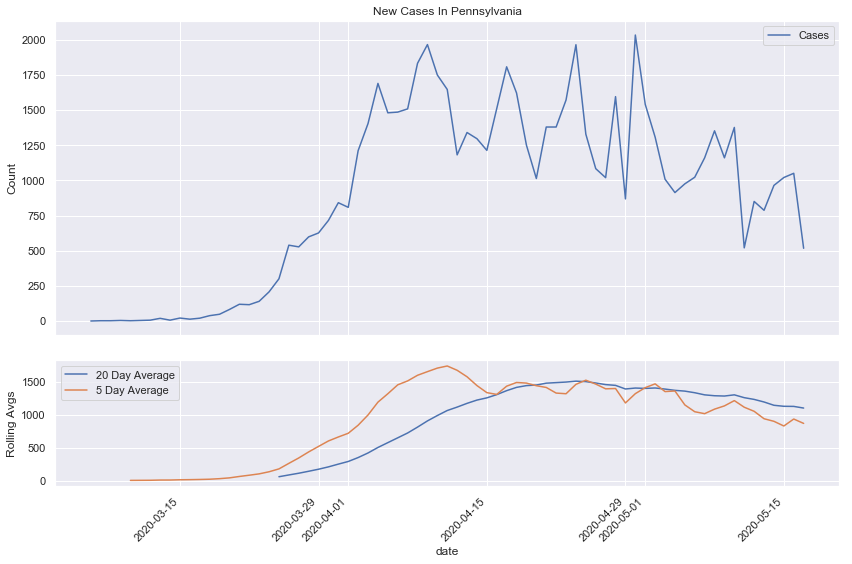

In [7]:
df_states_pa = df_states[df_states['state'] =='Pennsylvania'];

gs = gridspec.GridSpec(2, 1, height_ratios=[5, 2]) 
fig=plt.figure(figsize=(12,8))
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1], sharex=ax1)
ax1.plot(df_states_pa['date'], df_states_pa['new cases'], label='Cases')
ax2.plot(df_states_pa['date'], df_states_pa['new cases'].rolling(window=20).mean(),label='20 Day Average')
ax2.plot(df_states_pa['date'], df_states_pa['new cases'].rolling(window=5).mean(), label='5 Day Average')

plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), rotation=45, horizontalalignment='right' )

ax1.set_title("New Cases In Pennsylvania",)
ax1.set_ylabel('Count')
ax2.set_ylabel('Rolling Avgs')
ax2.set_xlabel('date')

ax1.legend()
ax2.legend()
plt.tight_layout()

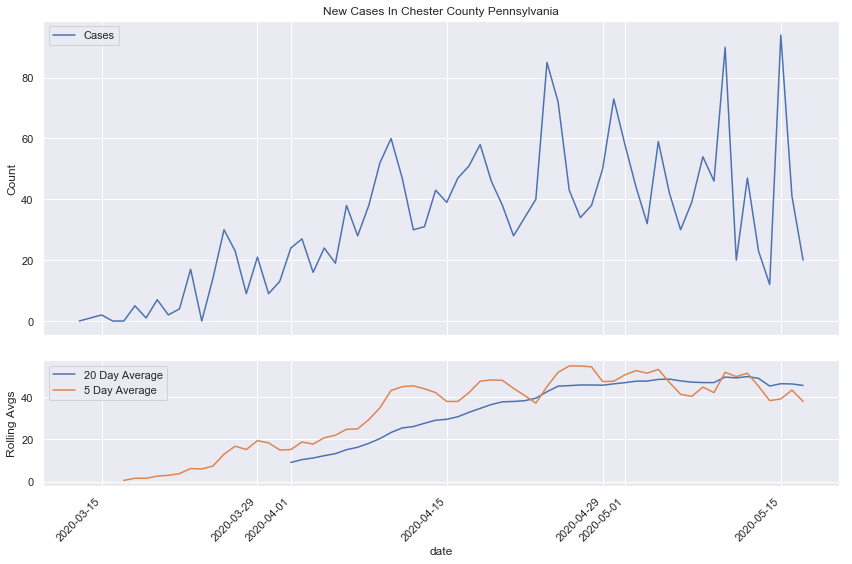

In [8]:
#plt.figure(figsize=(12,6))
#df_counties_chester_pa = df_counties[(df_counties['county'] == 'Chester') & (df_counties['state'] == 'Pennsylvania')];
#df_counties_chester_pa['new cases'].plot(label='New Cases')
#df_counties_chester_pa['new cases'].rolling(window=20).mean().plot(label='20 Day Moving Average')
#df_counties_chester_pa['new cases'].rolling(window=5).mean().plot(label='5 Day Moving Average')
#plt.title("New Cases In Chester County Pennsylvania")
#plt.legend()




df_counties_chester_pa = df_counties[(df_counties['county'] == 'Chester') & (df_counties['state'] == 'Pennsylvania')];

gs = gridspec.GridSpec(2, 1, height_ratios=[5, 2]) 
fig=plt.figure(figsize=(12,8))
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1], sharex=ax1)
ax1.plot(df_counties_chester_pa['date'], df_counties_chester_pa['new cases'], label='Cases')
ax2.plot(df_counties_chester_pa['date'], df_counties_chester_pa['new cases'].rolling(window=20).mean(),label='20 Day Average')
ax2.plot(df_counties_chester_pa['date'], df_counties_chester_pa['new cases'].rolling(window=5).mean(), label='5 Day Average')

plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), rotation=45, horizontalalignment='right' )

ax1.set_title("New Cases In Chester County Pennsylvania",)
ax1.set_ylabel('Count')
ax2.set_ylabel('Rolling Avgs')
ax2.set_xlabel('date')

ax1.legend()
ax2.legend()
plt.tight_layout()

In [9]:
df_totals = df_states.drop('fips', axis=1).groupby('date').sum().sort_values('date')
df_totals['date_ordinal'] = df_totals.index.map(lambda x: x.toordinal() - 737470)
df_totals['new cases'] = df_totals['cases'].diff()
df_totals['new deaths'] = df_totals['deaths'].diff()
df_totals['cases pct chg'] = df_totals['cases'].pct_change() * 100
df_totals['deaths pct chg'] = df_totals['deaths'].pct_change() * 100
df_totals['new cases pct chg'] = df_totals['new cases'].pct_change() * 100
df_totals['new deaths pct chg'] = df_totals['new deaths'].pct_change() * 100
df_totals = df_totals.replace([np.inf, -np.inf], 1)
df_totals = df_totals.round(1)
df_totals = df_totals.loc['2020-03-01':]

In [10]:
df_totals.fillna(0.0, inplace=True)
df_totals.sort_values(by='date', ascending=False).head(10)

,cases,deaths,new cases,new deaths,date_ordinal,cases pct chg,deaths pct chg,new cases pct chg,new deaths pct chg
date,,,,,,,,,
2020-05-17,1493653,89504,19041.0,844.0,92,1.3,1.0,-19.5,-31.1
2020-05-16,1474612,88660,23649.0,1225.0,91,1.6,1.4,-9.8,-23.1
2020-05-15,1450963,87435,26229.0,1593.0,90,1.8,1.9,-2.7,-8.3
2020-05-14,1424734,85842,26954.0,1738.0,89,1.9,2.1,27.5,-1.7
2020-05-13,1397780,84104,21141.0,1768.0,88,1.5,2.1,-5.2,6.8
2020-05-12,1376639,82336,22291.0,1655.0,87,1.6,2.1,26.7,67.3
2020-05-11,1354348,80681,17596.0,989.0,86,1.3,1.2,-13.4,6.2
2020-05-10,1336752,79692,20311.0,931.0,85,1.5,1.2,-18.5,-36.0
2020-05-09,1316441,78761,24915.0,1454.0,84,1.9,1.9,-9.7,-7.6


In [11]:
df_totals.describe()

,cases,deaths,new cases,new deaths,date_ordinal,cases pct chg,deaths pct chg,new cases pct chg,new deaths pct chg
count,7.800000e+01,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,5.503184e+05,29887.397436,19148.500000,1147.474359,53.500000,14.389744,17.607692,14.978205,12.115385
std,5.170496e+05,31507.707339,12276.590298,924.768567,22.660538,13.658208,26.195473,36.995885,38.823253
min,8.800000e+01,3.000000,16.000000,0.000000,15.000000,1.300000,0.000000,-27.700000,-100.000000
25%,1.963225e+04,295.750000,5837.250000,68.000000,34.250000,2.825000,3.650000,-5.200000,-12.700000
50%,4.485075e+05,17722.500000,24106.000000,1293.000000,53.500000,8.000000,12.300000,8.200000,7.150000
75%,1.012193e+06,57774.500000,28621.500000,1955.500000,72.750000,25.100000,24.125000,22.025000,30.800000
max,1.493653e+06,89504.000000,36840.000000,2748.000000,92.000000,48.400000,200.000000,260.000000,187.500000


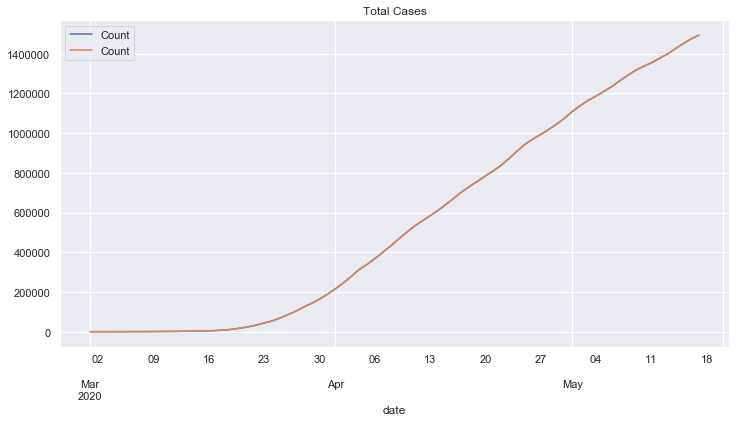

In [12]:
plt.figure(figsize=(12,6))
df_totals['cases'].plot(label='Count')
df_totals['cases'].plot(label='Count')
plt.title('Total Cases')
plt.legend()

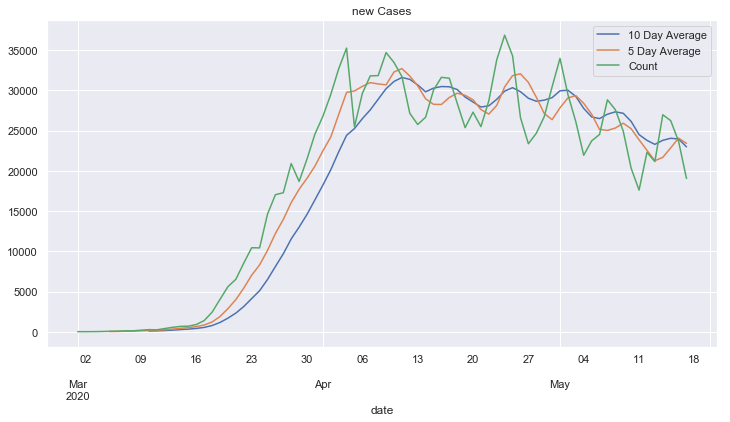

In [13]:
plt.figure(figsize=(12,6))
df_totals['new cases'].rolling(window=10).mean().plot(label='10 Day Average')
df_totals['new cases'].rolling(window=5).mean().plot(label='5 Day Average')
df_totals['new cases'].plot(label='Count')
plt.title('new Cases')
plt.legend()

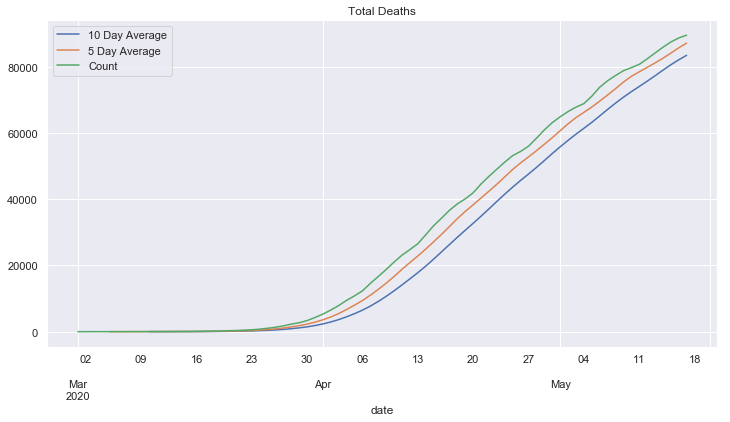

In [14]:
plt.figure(figsize=(12,6))
df_totals['deaths'].rolling(window=10).mean().plot(label='10 Day Average')
df_totals['deaths'].rolling(window=5).mean().plot(label='5 Day Average')
df_totals['deaths'].plot(label='Count')
plt.title('Total Deaths')
plt.legend()

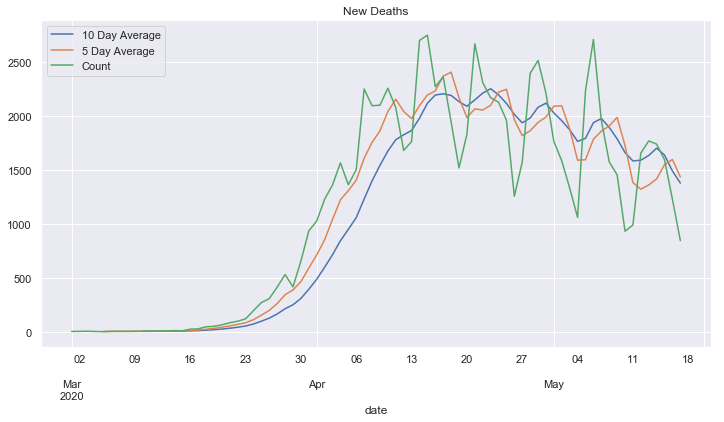

In [15]:
plt.figure(figsize=(12,6))
df_totals['new deaths'].rolling(window=10).mean().plot(label='10 Day Average')
df_totals['new deaths'].rolling(window=5).mean().plot(label='5 Day Average')
df_totals['new deaths'].plot(label='Count')
plt.title('New Deaths')
plt.legend()

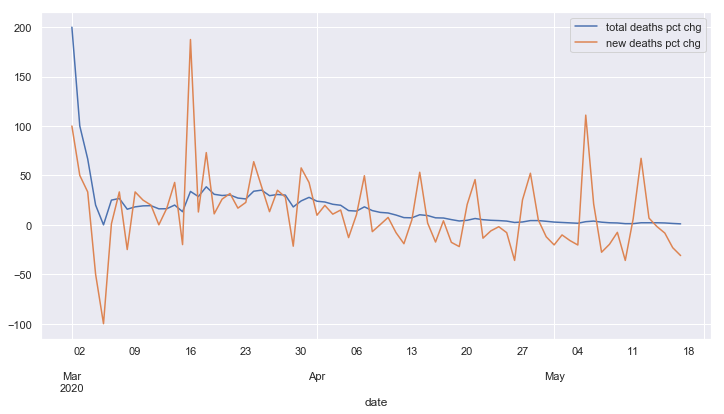

In [16]:
plt.figure(figsize=(12,6))
df_totals['deaths pct chg'].plot(label='total deaths pct chg')
df_totals['new deaths pct chg'].plot()
plt.legend()

/Users/dderman/.conda/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


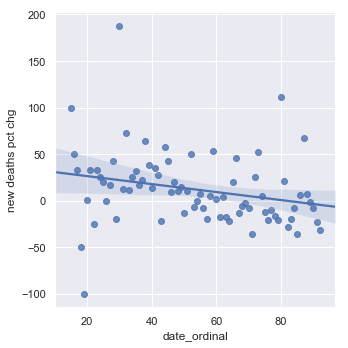

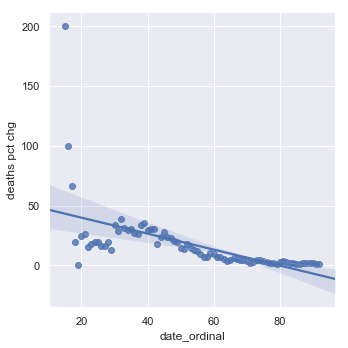

In [17]:
sns.lmplot(x='date_ordinal', y='new deaths pct chg', data=df_totals, fit_reg=True)
sns.lmplot(x='date_ordinal', y='deaths pct chg', data=df_totals, fit_reg=True)

# Pennsylvania Yellow Targets for Chester, Montgomery, and Bucks Counties
In order for counties in Pennyslvania to move from Red to Yellow phase, the number of new cases in the county must be less than 50 per 100k people over the previous 14 days.  The following chart shows the running 14 day sums, with the horizontal line representing the target number we must get to in order to to Yellow. 

In [18]:
df_chester = df_counties[(df_counties['county'] == 'Chester') & (df_counties['state'] == 'Pennsylvania')].sort_values('date')
df_chester['14 day cnt'] = df_chester['new cases'].rolling(window=14).sum()
df_chester = df_chester.dropna()

df_montgomery = df_counties[(df_counties['county'] == 'Montgomery') & (df_counties['state'] == 'Pennsylvania')].sort_values('date')
df_montgomery['14 day cnt'] = df_montgomery['new cases'].rolling(window=14).sum()

df_berks = df_counties[(df_counties['county'] == 'Berks') & (df_counties['state'] == 'Pennsylvania')].sort_values('date')
df_berks['14 day cnt'] = df_berks['new cases'].rolling(window=14).sum()

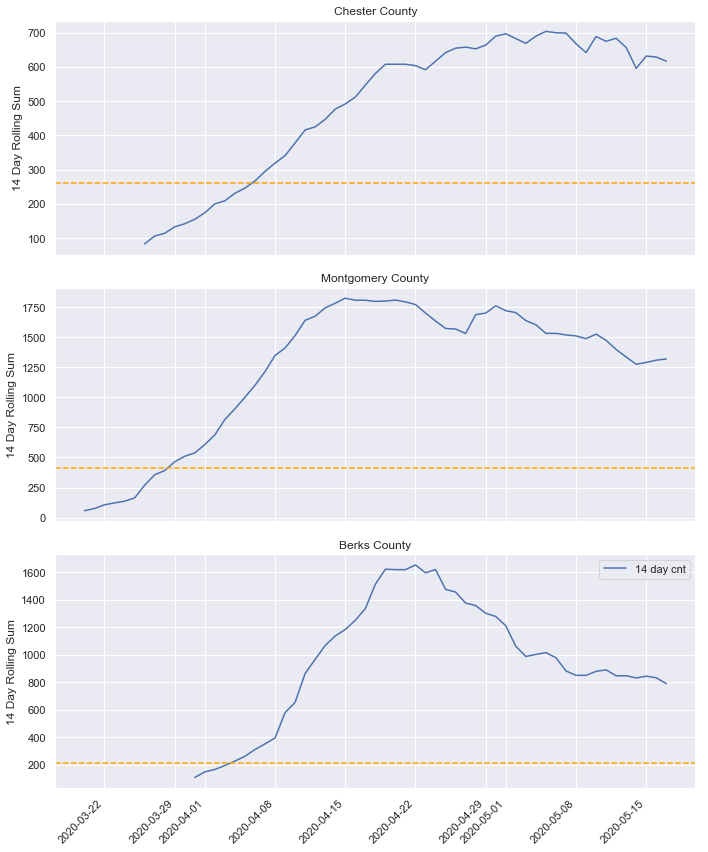

In [19]:
plt.figure(figsize=(10,12))

ax1 = plt.subplot(311)
plt.plot(df_chester['date'], df_chester['14 day cnt'])
ax1.axhline(262, ls='--', color='orange')
ax1.set_title('Chester County')
ax1.set_ylabel('14 Day Rolling Sum')

ax2 = plt.subplot(312, sharex=ax1)
plt.plot(df_montgomery['date'], df_montgomery['14 day cnt'])
ax2.axhline(415, ls='--', color='orange')
ax2.set_title('Montgomery County')
ax2.set_ylabel('14 Day Rolling Sum')

ax3 = plt.subplot(313, sharex=ax1)
plt.plot(df_berks['date'], df_berks['14 day cnt'])
ax3.axhline(211, ls='--', color='orange')
ax3.set_title('Berks County')
ax3.set_ylabel('14 Day Rolling Sum')

plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.legend()
#plt.title("Chester Country 14 Moving Sum of New Cases")
plt.tight_layout()

In [20]:
df_chester.sort_values('date', ascending=False).head(14)

,date,county,state,fips,cases,deaths,new cases,new deaths,14 day cnt
152275,2020-05-17,Chester,Pennsylvania,42029.0,2163,220,20.0,-2.0,617.0
149343,2020-05-16,Chester,Pennsylvania,42029.0,2143,222,41.0,4.0,629.0
146414,2020-05-15,Chester,Pennsylvania,42029.0,2102,218,94.0,5.0,632.0
143492,2020-05-14,Chester,Pennsylvania,42029.0,2008,213,12.0,16.0,596.0
140574,2020-05-13,Chester,Pennsylvania,42029.0,1996,197,23.0,8.0,657.0
137656,2020-05-12,Chester,Pennsylvania,42029.0,1973,189,47.0,2.0,684.0
134745,2020-05-11,Chester,Pennsylvania,42029.0,1926,187,20.0,3.0,675.0
131834,2020-05-10,Chester,Pennsylvania,42029.0,1906,184,90.0,1.0,689.0
128924,2020-05-09,Chester,Pennsylvania,42029.0,1816,183,46.0,7.0,642.0
126014,2020-05-08,Chester,Pennsylvania,42029.0,1770,176,54.0,9.0,668.0


In [21]:
df_montgomery.sort_values('date', ascending=False).head(14)

,date,county,state,fips,cases,deaths,new cases,new deaths,14 day cnt
152306,2020-05-17,Montgomery,Pennsylvania,42091.0,5872,620,75.0,6.0,1320.0
149374,2020-05-16,Montgomery,Pennsylvania,42091.0,5797,614,100.0,6.0,1310.0
146445,2020-05-15,Montgomery,Pennsylvania,42091.0,5697,608,114.0,21.0,1291.0
143523,2020-05-14,Montgomery,Pennsylvania,42091.0,5583,587,70.0,31.0,1276.0
140605,2020-05-13,Montgomery,Pennsylvania,42091.0,5513,556,71.0,22.0,1336.0
137687,2020-05-12,Montgomery,Pennsylvania,42091.0,5442,534,150.0,9.0,1399.0
134776,2020-05-11,Montgomery,Pennsylvania,42091.0,5292,525,32.0,0.0,1475.0
131865,2020-05-10,Montgomery,Pennsylvania,42091.0,5260,525,144.0,2.0,1527.0
128955,2020-05-09,Montgomery,Pennsylvania,42091.0,5116,523,79.0,8.0,1489.0
126045,2020-05-08,Montgomery,Pennsylvania,42091.0,5037,515,122.0,9.0,1512.0


In [22]:
df_berks.sort_values('date', ascending=False).head(14)

,date,county,state,fips,cases,deaths,new cases,new deaths,14 day cnt
152266,2020-05-17,Berks,Pennsylvania,42011.0,3677,208,34.0,0.0,791.0
149334,2020-05-16,Berks,Pennsylvania,42011.0,3643,208,50.0,1.0,833.0
146405,2020-05-15,Berks,Pennsylvania,42011.0,3593,207,63.0,11.0,845.0
143483,2020-05-14,Berks,Pennsylvania,42011.0,3530,196,45.0,17.0,832.0
140565,2020-05-13,Berks,Pennsylvania,42011.0,3485,179,32.0,7.0,848.0
137647,2020-05-12,Berks,Pennsylvania,42011.0,3453,172,36.0,1.0,848.0
134736,2020-05-11,Berks,Pennsylvania,42011.0,3417,171,46.0,1.0,891.0
131825,2020-05-10,Berks,Pennsylvania,42011.0,3371,170,114.0,1.0,880.0
128915,2020-05-09,Berks,Pennsylvania,42011.0,3257,169,67.0,1.0,851.0
126005,2020-05-08,Berks,Pennsylvania,42011.0,3190,168,95.0,0.0,851.0
